PLotting the DFT
DFT of real world signals; Mapping of DFT coeffs to real world frequencies and investigate the frequency resolution of DFT and effects of zero padding.
we are expressing the information contained in signal in terms of sinusoidal componenets rather than in terms of pointwise data. the sinusoidal components have all an interger number of periods over the lenght of data signal

In python we will use the fft module in Numpy to compute the DFT

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"]=(14,4)

typically we will take the vector of data points, compute the DFT and plot the magnitude of the result. for instance, consider the DFT of linear ramp

C:\Users\Micheal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

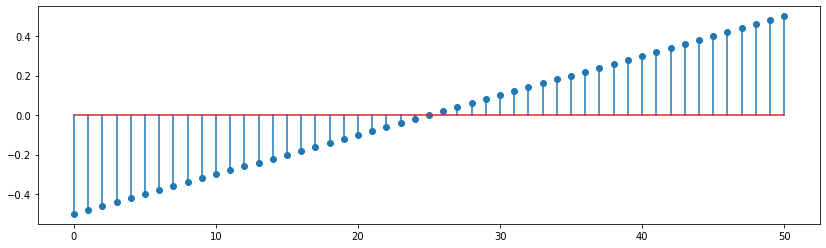

In [23]:
x = np.arange(0, 1.02, 0.02) -0.5
plt.stem(x)

<StemContainer object of 3 artists>

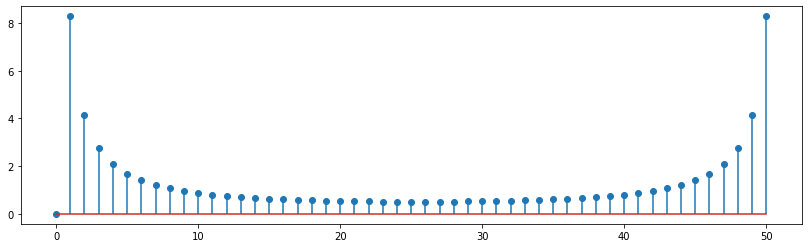

In [24]:
X = np.fft.fft(x)
plt.stem(abs(X), use_line_collection=True)


Positive and negative frequencies
the coefficient number k indicates the contribution( in amplitude and phase) of a sinusoidal component of frequency

because of rotational symmetry of complex exponenetials, a ppositive freq between pi and 2*pi is equivalent to a negative frequency of omega - 2*pi; this means that half of DFT coeffs correspond to negative frequencies and when we concentrate on the physical properties of DFT it would probably make more sense to plot the coeffs centered around zero with positive freq on the right and negative frequencies on  the left

The reason why this is not usuall done are many, including

convenience
since we are manipulating finite-length signals, the convention dictates that we start at index zero
when dealing with real-valued data, the DFT is symmetric in magnitude, so the first half of the coefficients is enough
if we're looking for maxima in the magnitude, it's just easier to start at zero.
There is also another subtle point that we must take into account when shifting a DFT vector: we need to differentiate between odd and even length signals. With k=0 as the center point, odd-length vectors will produce symmetric data sets with (N−1)/2 points left and right of the oring, whereas even-length vectors will be asymmetric, with one more point on the positive axis; indeed, the highest positive frequency for even-length signals will be equal to ωN/2=π. Since the frequencies of π and −π are identical, we can copy the top frequency data point to the negative axis and obtain a symmetric vector also for even-length signals.

Here is a function that does that:

In [25]:
def dft_shift(X):
    N = len(X)
    if(N%2 ==0):
        #even-length: return N+1 values
        return np.concatenate((X[(N/2):], X[:(N/2)+1]))
    else:
        #odd- length:return N values
        return np.concatenate((X[int((N+1)/2):], X[:int((N-1)/2)]))

<StemContainer object of 3 artists>

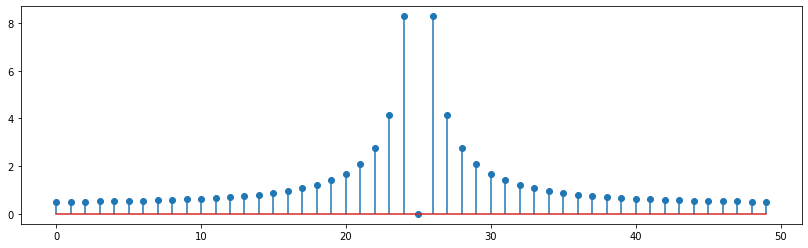

In [26]:
plt.stem(abs(dft_shift(X)), use_line_collection=True)

While the function does shift the vector, the indices are still from zero to N−1. Let's modify it so that we returs also the proper values for the indices:

In [27]:
def dft_shift(X):
    N = len(X)
    if (N % 2 == 0):
        # even-length: return N+1 values
        return np.arange(-int(N/2), int(N/2) + 1), np.concatenate((X[int(N/2):], X[:int(N/2)+1]))
    else:
        # odd-length: return N values
        return np.arange(-int((N-1)/2), int((N-1)/2) + 1), np.concatenate((X[int((N+1)/2):], X[:int((N+1)/2)]))

C:\Users\Micheal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


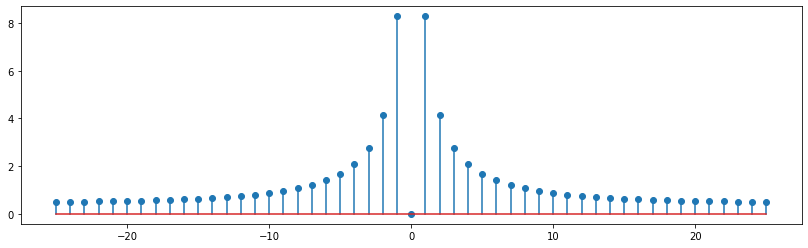

In [28]:
n, y = dft_shift(X)
plt.stem(n, abs(y));

Mapping the DFT index to real-world frequencies

The next step is to use the DFT to analyze real-world signals. As we have seen in previous examples, what we need to do is set the time interval between samples or, in other words, set the "clock" of the system. For audio, this is equivalent to the sampling rate of the file.

Here for instance is the sound of a piano

C:\Users\Micheal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


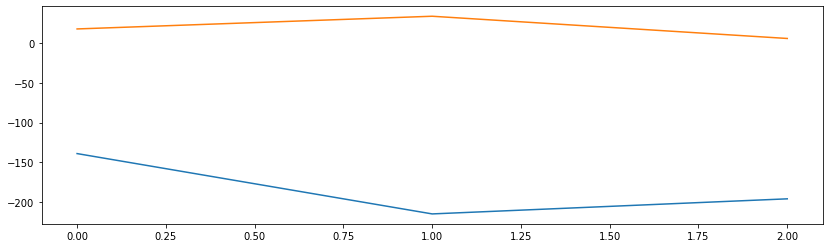

In [29]:
import IPython
from scipy.io import wavfile
Fs, x = wavfile.read('file_example_WAV_2MG.wav')
plt.plot(x[:3])
IPython.display.Audio(x[:10000], rate= Fs)


In order to look at the spectrum of the sound file with a DFT we need to map the digital frequency "bins" of the DFT to real-world frequencies.

The k-th basis function over CN completes k periods over N samples. If the time between samples is 1/Fs, then the real-world frequency of the k-th basis function is periods over time, namely $k(F_s/N).

Let's remap the DFT coefficients using the sampling rate:

In [30]:
def dft_map(X, Fs, shift = True):
    resolution = float(Fs)/len(X)
    if shift:
        n, Y = dft_shift(X)
    else:
        Y=X
        n = np.arange(0, len(Y))
    f= n*resolution
    return f, Y

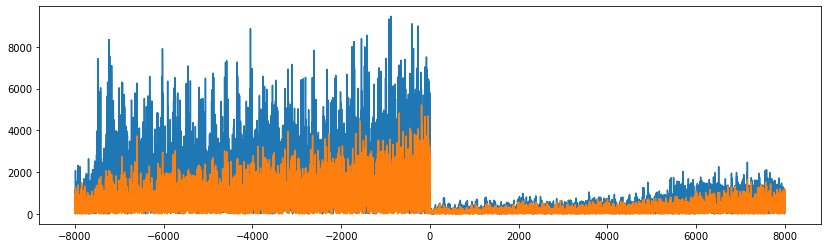

In [31]:
x= x[:10000]
X= np.fft.fft(x);
f, y = dft_map(X, Fs)
plt.plot(f, abs(y));

The plot shows what a spectrum analyzer would display. We can see the periodic pattern in the sound, like for all musical tones. If we want to find out the original pitch we need to zoom in in the plot and find the first peak. This is one of the instances in which shifting the DFT does not help, since we'll be looking in the low-frequency range. So let's re-plot withouth the shift, but still mapping the frequencies:

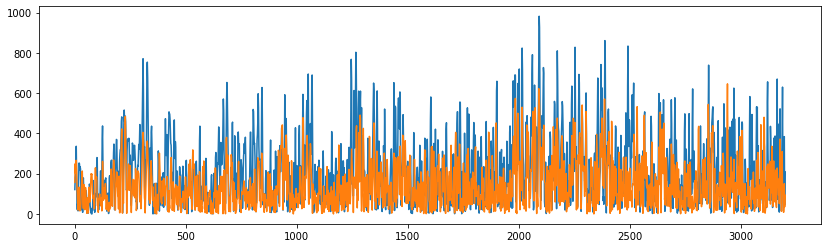

In [32]:
X = np.fft.fft(x);
f, y = dft_map(X, Fs, shift=False)
plt.plot(f[:2000], abs(y[:2000]));

to find the exact frequency (to within the resolution afforded by this DFT) let's find the location

In [33]:
dft_resolution = float(Fs)/ len(x)
print("DFT resolution is", dft_resolution, "Hz")

# let's search up to 300Hz
max_range = int(300 / dft_resolution)
ix = np.argmax(abs(y[:max_range]))
pitch = f[ix]
print("the note has a pitch of", pitch, "Hz")

DFT resolution is 1.6 Hz
the note has a pitch of 444.8 Hz


Zero padding

since the resolution of DFT depends on the length of data vector, one may erroneously assume that, by artificially extending the given data set, the resulting resolution would imporve. Note that here we are not tslking about collecting more data; rather we have a data set and we append zeros(or any other constant) to end of it. This extension is called zero padding.

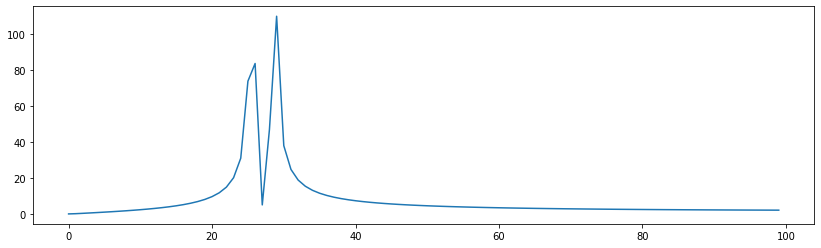

In [35]:
N= 256
Delta = 2*np.pi/N
n= np.arange(0, N)

# main frequency( not a multiple of fundamental freq forthe space)
omega = 2*np.pi/10
x = np.cos(omega*n)+np.cos((omega+ 3*Delta)*n)

plt.plot(abs(np.fft.fft(x))[:100]);

we can tell the two frequencies apart and, if you zoom in on the plot, you will see that they are indeed three indices apart. Now let's build a signal with two frequencies that are less than  Δ  apart:

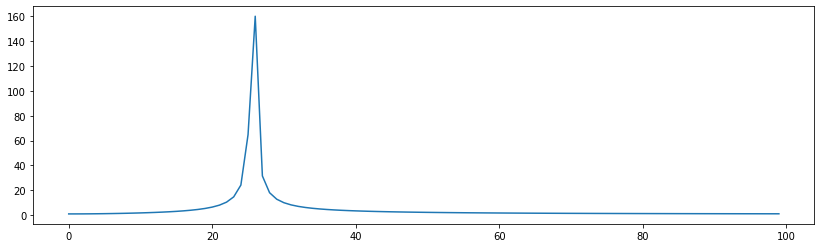

In [36]:
x = np.cos(omega * n) + np.cos((omega + 0.5*Delta) * n)
plt.plot(abs(np.fft.fft(x))[:100]);

The two frequencies cannot be resolved by the DFT. If you try to increase the data vector by zero padding, the plot will still display just one peak:

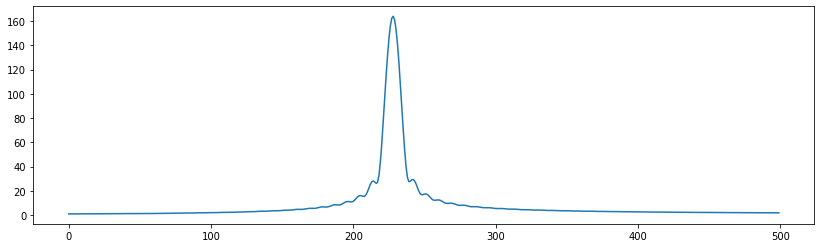

In [37]:
xzp = np.concatenate((x, np.zeros(2000)))
plt.plot(abs(np.fft.fft(xzp))[:500]);